### 1.Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

 
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


import matplotlib.pyplot as plt
import seaborn as sns


### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
df_customer=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
df_customer.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [13]:
df_customer.columns=df_customer.columns.str.lower().str.replace('.','_')


In [14]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9133 entries, 1 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9133 non-null   object 
 1   customer lifetime value        9133 non-null   float64
 2   response                       9133 non-null   object 
 3   coverage                       9133 non-null   object 
 4   education                      9133 non-null   object 
 5   effective to date              9133 non-null   object 
 6   employmentstatus               9133 non-null   object 
 7   income                         9133 non-null   int64  
 8   location code                  9133 non-null   object 
 9   marital status                 9133 non-null   object 
 10  monthly premium auto           9133 non-null   int64  
 11  months since last claim        9133 non-null   int64  
 12  months since policy inception  9133 non-null   i

In [5]:
df_customer.drop(index = 0 , inplace = True)

In [6]:
df_customer=df_customer.drop('customer' , axis= 1)

In [15]:
categorical_df=df_customer.select_dtypes(object)
categorical_df

,state,response,coverage,education,effective to date,employmentstatus,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [8]:
numerical_df = df_customer.select_dtypes(np.number)
numerical_df.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042


### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables

In [9]:
for col in categorical_df:
    print(col)
    print(df_customer[col].value_counts())
    print('-----')

state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     797
Name: state, dtype: int64
-----
response
No     7825
Yes    1308
Name: response, dtype: int64
-----
coverage
Basic       5567
Extended    2742
Premium      824
Name: coverage, dtype: int64
-----
education
Bachelor                2747
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
-----
effective to date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/3/11     158
2/5/11     158
2/22/11    158
2/7/11     157
2/12/11    156
1/23/11    155
1/18/11    154
2/1/11     154
1/15/11    153
1/14/11    152
2/11/11    151
1/25/11    151


In [10]:
for col in numerical_df:
    print(col)
    print(df_customer[col].value_counts())
    print('-----')

NameError: name 'numerical_df' is not defined

#### 5.Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

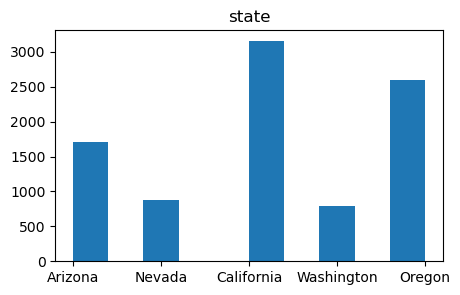

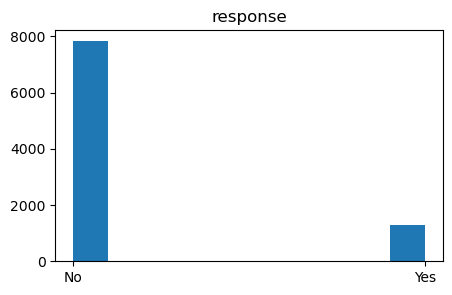

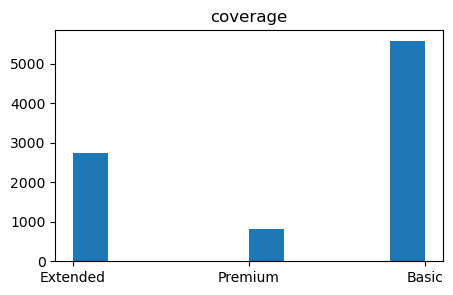

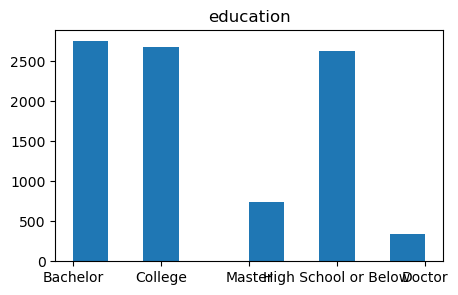

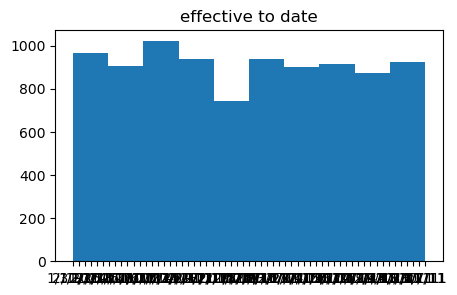

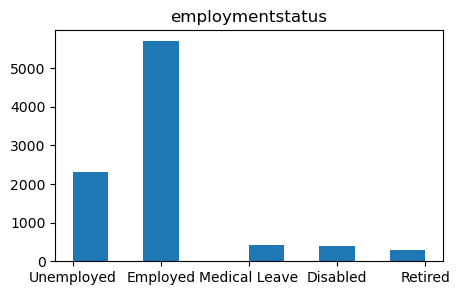

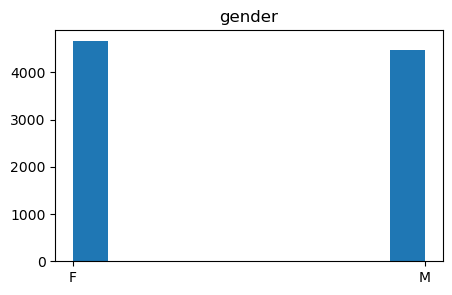

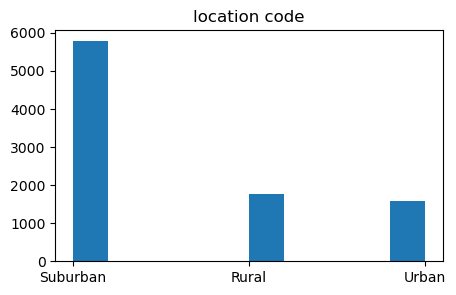

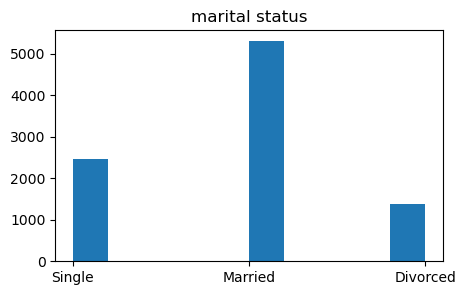

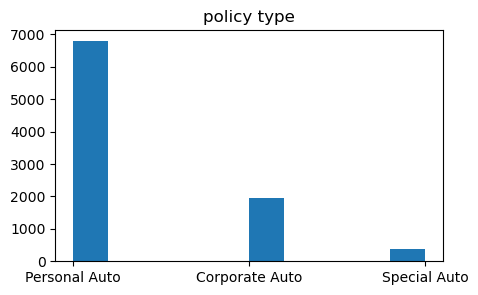

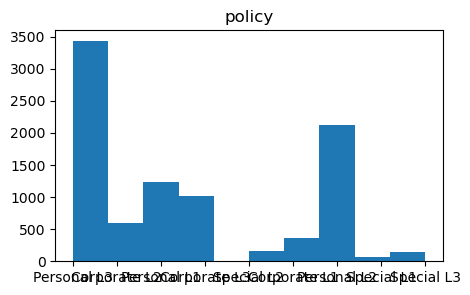

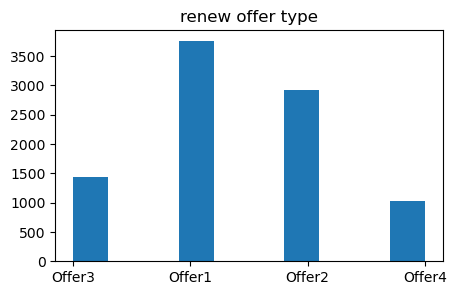

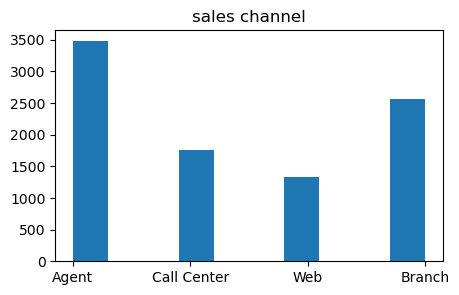

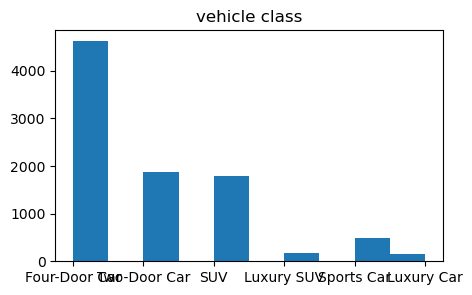

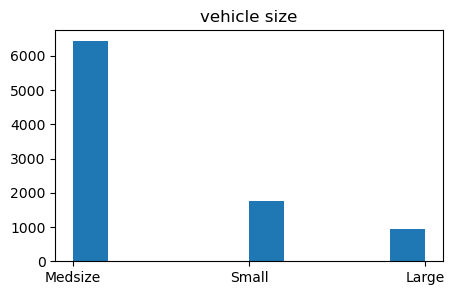

In [14]:
for col in categorical_df:
    fig, ax = plt.subplots(figsize =(5,3))
    ax.hist(df_customer[col])
    plt.title(col)
    plt.show()

### 6.For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [28]:
for col in categorical_df:
    print(col)
    print(df_customer[col].value_counts())
    print('-----')

customer
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
-----
state
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
-----
response
No     7826
Yes    1308
Name: response, dtype: int64
-----
coverage
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
-----
education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
-----
effective to date
1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11  

# FEATURE EXTRACTION

In [9]:
categoricals = df_customer.select_dtypes(np.object)
categoricals.head()

,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


In [10]:
df_customer.gender.value_counts()

F    4657
M    4476
Name: gender, dtype: int64

In [11]:
df_customer = df_customer.drop(['gender'], axis=1)
df_customer

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,income,location code,marital status,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,62902,Rural,Married,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [16]:
tipo_vehiculo_labels = ['Four-Door Car', 'Two-Door Car','SUV','Sports Car','Luxury SUV','Luxury Car']

In [19]:
df_customer['vehicle class_'] = pd.cut(df_customer['vehicle class'],5,labels=tipo_vehiculo_labels)
df_customer

TypeError: can only concatenate str (not "float") to str

In [25]:
df_customer.head()

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,income,location code,marital status,...,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,62902,Rural,Married,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize


In [18]:
vals = df_customer.state.value_counts()
vals

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     797
Name: state, dtype: int64

In [19]:
vals = pd.DataFrame(vals)
vals = vals.reset_index()

In [20]:
vals

,index,state
0,California,3150
1,Oregon,2601
2,Arizona,1703
3,Nevada,882
4,Washington,797


In [21]:
vals.columns = ['state', 'counts']
#vals.columns=['counts']
vals

,state,counts
0,California,3150
1,Oregon,2601
2,Arizona,1703
3,Nevada,882
4,Washington,797


AttributeError: 'DataFrame' object has no attribute 'vehicle_class'